# Problema da Mochila #
## Computação Evolutiva e Conexionista - UFABC - 2024.1##
## Professor – Hugo Puertas de Araújo##

Erick, Erick Fasterra da Silva, Gabriel Yuto Munakata, Igor Ouverney, João Pedro Leal, João Vitor, Pedro Negrão, Renan Fukamizu




### Importação das libs utilizadas

In [ ]:
from random import random, randint, shuffle
from matplotlib import pyplot as plt
import numpy as np

### Definição das funções ###

In [ ]:
def fitness(individuo, val_peso, peso_maximo):
  peso_individuo = 0
  valor_individuo = 0
  for indice, _ in enumerate(individuo):
    valor_individuo += (individuo[indice] * val_peso[indice][0])
    peso_individuo += (individuo[indice] * val_peso[indice][1])
    if(peso_individuo > peso_maximo):
      return -1
  return valor_individuo

def sorteio_roleta(populacao, idx_ignorar = -1):
  valores = list(zip(*populacao))
  fitness_soma = sum(valores[0])

  if idx_ignorar != -1:
    fitness_soma = fitness_soma - valores[0][idx_ignorar]

  sorteio = []
  acumulador = 0
  valor_sorteio = random()

  for idx, val in enumerate(valores[0]):
    if val <= 0:
      continue
    if idx_ignorar != idx:
      acumulador += val
      sorteio.append(acumulador/fitness_soma)
      if sorteio[-1] >= valor_sorteio:
        return idx

def selecao_ancestrais_por_roleta(populacao):
  x1_idx = sorteio_roleta(populacao)
  x2_idx = sorteio_roleta(populacao, x1_idx)

  valores = list(zip(*populacao))

  return valores[1][x1_idx], valores[1][x2_idx]

def sorteio_aleatorio(populacao):
  populacao_copy = populacao.copy()
  shuffle(populacao_copy)

  for elemento in populacao_copy:
      if elemento[0] <= 0:
          continue
      yield elemento[1]

def gera_individuo(tamanho_individuo):
  return [ randint(0, 1) for x in range(tamanho_individuo) ]

def gera_populacao(tamanho_populacao, tamanho_individuo):
  return [ gera_individuo(tamanho_individuo) for x in range(tamanho_populacao) ]

def crossover(pai_1, pai_2):
    corte = randint(1, len(pai_1) - 1)
    filho_1 = pai_1[:corte] + pai_2[corte:]
    filho_2 = pai_2[:corte] + pai_1[corte:]
    return filho_1, filho_2

def mutacao(cromossomo):
    indice = randint(0, len(cromossomo)-1)
    cromossomo[indice] = 0 if cromossomo[indice] else 1
    return cromossomo

def selecao_elitismo(ancestrais, n_elitismo):
    ancestrais.sort(reverse=True)
    return list(zip(*ancestrais[:n_elitismo]))[1]

def evolve(populacao, tamanho_populacao, peso_maximo, itens_val_peso, tx_mutacao, tx_crossover, tx_elitismo):
  # Avalia o fitness
  ancestrais = [[fitness(individuo, itens_val_peso, peso_maximo), individuo] for individuo in populacao]

  nova_populacao = []

  sorteio_mutacao = sorteio_aleatorio(ancestrais)

  qtd_individuos_mutacao = int(len(ancestrais) * tx_mutacao)
  qtd_individuos_crossover = int(len(ancestrais) * tx_crossover)
  qtd_individuos_elitismo = int(len(ancestrais) * tx_elitismo)

  # Crossover
  for x in range(qtd_individuos_crossover):
    x1, x2 = selecao_ancestrais_por_roleta(ancestrais)
    filho_1, filho_2 = crossover(x1, x2)
    if(fitness(filho_1, itens_val_peso, peso_max)):
      nova_populacao.append(filho_1)

  # Mutação
  for x in range(qtd_individuos_mutacao):
    individuo_selecionado = next(sorteio_mutacao)
    individuo_mutado = mutacao(individuo_selecionado)
    if(fitness(individuo_mutado, itens_val_peso, peso_max)):
      nova_populacao.append(individuo_mutado)

  # Elitismo
  individuos_elitistas = selecao_elitismo(ancestrais, qtd_individuos_elitismo)
  for individuo in individuos_elitistas:
    nova_populacao.append(individuo)

  return nova_populacao, ancestrais[0][1], ancestrais[0][0]


### Testando o algoritmo genético ###

In [ ]:
itens_val_peso = [[150, 3.5], [100, 2.0], [50, 0.5], [80, 1.0], [30, 0.2], \
                 [20, 0.5], [15, 0.1], [20, 0.2], [10, 0.1], [25, 0.3], \
                 [15, 1.8], [50, 0.5], [50, 3.0], [70, 1.5], [30, 1.2], \
                 [20, 0.5], [80, 1.5], [120, 2.0], [20, 0.5], [30, 0.5]]

peso_max = 15
tamanho_populacao = 1000
numero_geracoes = 50

tx_mutacao = 0.5
tx_crossover = 0.4   # A soma das taxas deve dar 1.0 (100%)
tx_elitismo = 0.1

historico_fitness = []
populacao = gera_populacao(tamanho_populacao, len(itens_val_peso))
for i in range(numero_geracoes):
    populacao, melhor_individuo, fitness_individuo = evolve(populacao, tamanho_populacao, peso_max,
                                                            itens_val_peso, tx_mutacao, tx_crossover, tx_elitismo)
    historico_fitness.append(fitness_individuo)
    print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
fitness_final = [fitness(individuo, itens_val_peso, peso_max) for individuo in populacao]
fitness_final.sort(reverse=True)
print(fitness_final)


gen: 0 - melhor fitness: 755 - melhor solucao [1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1] - tamanho 1000
gen: 1 - melhor fitness: 780 - melhor solucao [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0] - tamanho 1000
gen: 2 - melhor fitness: 770 - melhor solucao [1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1] - tamanho 1000
gen: 3 - melhor fitness: 835 - melhor solucao [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0] - tamanho 1000
gen: 4 - melhor fitness: 835 - melhor solucao [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0] - tamanho 1000
gen: 5 - melhor fitness: 840 - melhor solucao [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] - tamanho 1000
gen: 6 - melhor fitness: 840 - melhor solucao [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1] - tamanho 1000
gen: 7 - melhor fitness: 840 - melhor solucao [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1] - tamanho 1000
gen: 8 - melhor fitness:

### Plotar os resultados obtidos ###

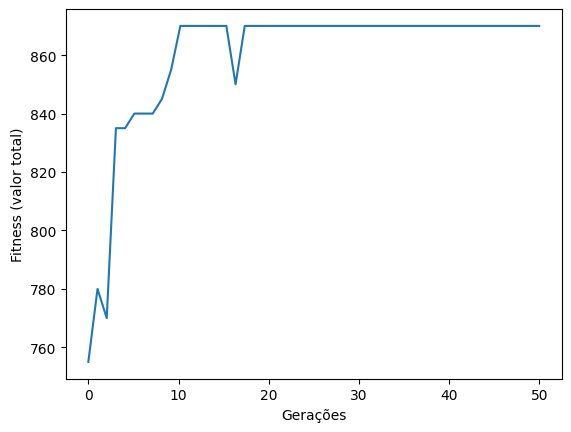

In [ ]:
plt.plot(np.linspace(0, len(historico_fitness), num = len(historico_fitness)), historico_fitness)
plt.xlabel("Gerações")
plt.ylabel("Fitness (valor total)")
plt.show()

### Modificando os hiperparâmetros ###



In [ ]:
#população menor e mais rodadas de ferramentas genéticas

peso_max = 15
tamanho_populacao = 100
numero_geracoes = 1000
tx_mutacao = 0.01
tx_crossover = 0.49
tx_elitismo = 0.5

historico_fitness = []
populacao = gera_populacao(tamanho_populacao, len(itens_val_peso))
for i in range(numero_geracoes):
    populacao, melhor_individuo, fitness_individuo = evolve(populacao, tamanho_populacao, peso_max, itens_val_peso, tx_mutacao, tx_crossover, tx_elitismo)
    historico_fitness.append(fitness_individuo)
    print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
fitness_final = [fitness(individuo, itens_val_peso, peso_max) for individuo in populacao]
fitness_final.sort(reverse=True)
print(fitness_final)


gen: 0 - melhor fitness: 715 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1] - tamanho 100
gen: 1 - melhor fitness: 715 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1] - tamanho 100
gen: 2 - melhor fitness: 800 - melhor solucao [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1] - tamanho 100
gen: 3 - melhor fitness: 800 - melhor solucao [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1] - tamanho 100
gen: 4 - melhor fitness: 820 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] - tamanho 100
gen: 5 - melhor fitness: 820 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] - tamanho 100
gen: 6 - melhor fitness: 820 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] - tamanho 100
gen: 7 - melhor fitness: 820 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1] - tamanho 100
gen: 8 - melhor fitness: 820 - m

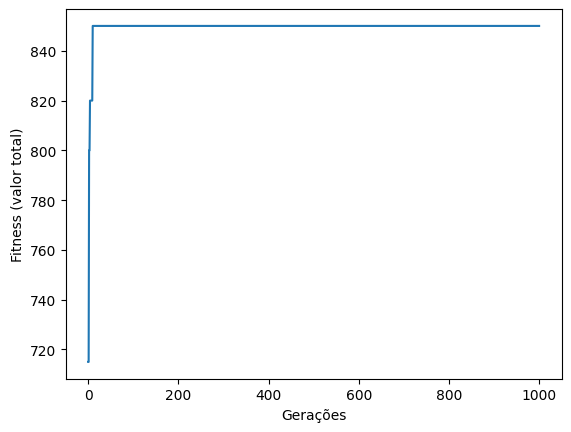

In [ ]:
plt.plot(np.linspace(0, len(historico_fitness), num = len(historico_fitness)), historico_fitness)
plt.xlabel("Gerações")
plt.ylabel("Fitness (valor total)")
plt.show()

### Modificando os itens diponíveis ###

In [ ]:

itens_val_peso = [[150, 3.2], [110, 1.0], [55, 0.5], [80, 1.0], [44, 0.3], \
                 [20, 0.5], [15, 0.1], [20, 0.2], [10, 0.1], [22, 1.3], \
                 [15, 1.8], [30, 0.7], [52, 3.0], [7, 0.5], [3, 0.2], \
                 [21, 1.5], [82, 1.0], [140, 2.0], [20, 0.5], [30, 0.5], \
                 [142, 1.7], [168, 1.9], [4, 1.9], [186, 2.1], \
                  [61, 1.4], [35, 0.5], [69, 0.8]]

len(itens_val_peso)
peso_max = 15
tamanho_populacao = 1000
numero_geracoes = 50
tx_mutacao = 0.01
tx_crossover = 0.49
tx_elitismo = 0.5

historico_fitness = []
populacao = gera_populacao(tamanho_populacao, len(itens_val_peso))
for i in range(numero_geracoes):
    populacao, melhor_individuo, fitness_individuo = evolve(populacao, tamanho_populacao, peso_max, itens_val_peso, tx_mutacao, tx_crossover, tx_elitismo)
    historico_fitness.append(fitness_individuo)
    # print(populacao)
    print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
fitness_final = [fitness(individuo, itens_val_peso, peso_max) for individuo in populacao]
fitness_final.sort(reverse=True)
print(fitness_final)


gen: 0 - melhor fitness: 1090 - melhor solucao [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0] - tamanho 1000
gen: 1 - melhor fitness: 1090 - melhor solucao [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0] - tamanho 1000
gen: 2 - melhor fitness: 1090 - melhor solucao [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0] - tamanho 1000
gen: 3 - melhor fitness: 1090 - melhor solucao [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0] - tamanho 1000
gen: 4 - melhor fitness: 1090 - melhor solucao [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0] - tamanho 1000
gen: 5 - melhor fitness: 1103 - melhor solucao [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0] - tamanho 1000
gen: 6 - melhor fitness: 1103 - melhor solucao [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0] - taman

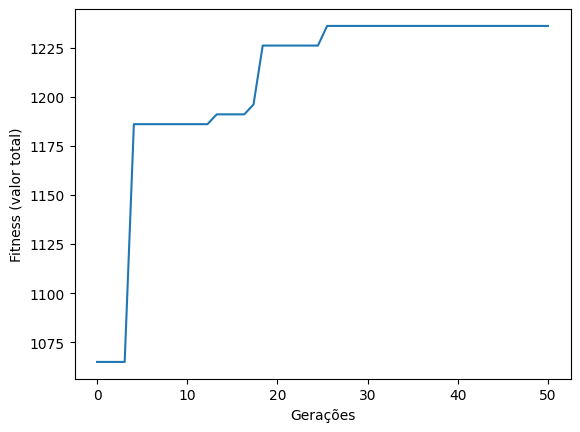

In [ ]:
plt.plot(np.linspace(0, len(historico_fitness), num = len(historico_fitness)), historico_fitness)
plt.xlabel("Gerações")
plt.ylabel("Fitness (valor total)")
plt.show()

### Modificando novamente os hiperparâmetros ###

In [ ]:
itens_val_peso = [[150, 3.5], [100, 2.0], [50, 0.5], [80, 1.0], [30, 0.2], \
                 [20, 0.5], [15, 0.1], [20, 0.2], [10, 0.1], [25, 0.3], \
                 [15, 1.8], [50, 0.5], [50, 3.0], [70, 1.5], [30, 1.2], \
                 [20, 0.5], [80, 1.5], [120, 2.0], [20, 0.5], [30, 0.5]]

peso_max = 15
tamanho_populacao = 100
numero_geracoes = 50
tx_mutacao = 0.2
tx_crossover = 0.7
tx_elitismo = 0.1

historico_fitness = []
populacao = gera_populacao(tamanho_populacao, len(itens_val_peso))
for i in range(numero_geracoes):
    populacao, melhor_individuo, fitness_individuo = evolve(populacao, tamanho_populacao, peso_max, itens_val_peso, tx_mutacao, tx_crossover, tx_elitismo)
    historico_fitness.append(fitness_individuo)
    # print(populacao)
    print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
fitness_final = [fitness(individuo, itens_val_peso, peso_max) for individuo in populacao]
fitness_final.sort(reverse=True)
print(fitness_final)


gen: 0 - melhor fitness: 765 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1] - tamanho 100
gen: 1 - melhor fitness: 765 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1] - tamanho 100
gen: 2 - melhor fitness: 765 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1] - tamanho 100
gen: 3 - melhor fitness: 765 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1] - tamanho 100
gen: 4 - melhor fitness: 785 - melhor solucao [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1] - tamanho 100
gen: 5 - melhor fitness: 815 - melhor solucao [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1] - tamanho 100
gen: 6 - melhor fitness: 835 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1] - tamanho 100
gen: 7 - melhor fitness: 850 - melhor solucao [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1] - tamanho 100
gen: 8 - melhor fitness: 850 - m

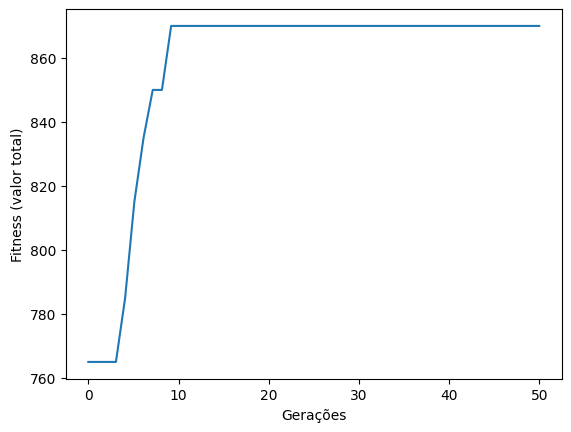

In [ ]:
plt.plot(np.linspace(0, len(historico_fitness), num = len(historico_fitness)), historico_fitness)
plt.xlabel("Gerações")
plt.ylabel("Fitness (valor total)")
plt.show()

In [ ]:
itens_val_peso = [[150, 3.5], [100, 2.0], [50, 0.5], [80, 1.0], [30, 0.2], \
                 [20, 0.5], [15, 0.1], [20, 0.2], [10, 0.1], [25, 0.3], \
                 [15, 1.8], [50, 0.5], [50, 3.0], [70, 1.5], [30, 1.2], \
                 [20, 0.5], [80, 1.5], [120, 2.0], [20, 0.5], [30, 0.5]]

peso_max = 15
tamanho_populacao = 100
numero_geracoes = 50
tx_mutacao = 0.6
tx_crossover = 0.3
tx_elitismo = 0.1

historico_fitness = []
populacao = gera_populacao(tamanho_populacao, len(itens_val_peso))
for i in range(numero_geracoes):
    populacao, melhor_individuo, fitness_individuo = evolve(populacao, tamanho_populacao, peso_max, itens_val_peso, tx_mutacao, tx_crossover, tx_elitismo)
    historico_fitness.append(fitness_individuo)
    # print(populacao)
    print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
print('gen:', i, '- melhor fitness:', fitness_individuo, '- melhor solucao', melhor_individuo, '- tamanho', len(populacao))
fitness_final = [fitness(individuo, itens_val_peso, peso_max) for individuo in populacao]
fitness_final.sort(reverse=True)
print(fitness_final)


gen: 0 - melhor fitness: 755 - melhor solucao [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1] - tamanho 100
gen: 1 - melhor fitness: 755 - melhor solucao [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1] - tamanho 100
gen: 2 - melhor fitness: 735 - melhor solucao [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] - tamanho 100
gen: 3 - melhor fitness: 740 - melhor solucao [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] - tamanho 100
gen: 4 - melhor fitness: 735 - melhor solucao [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] - tamanho 100
gen: 5 - melhor fitness: 775 - melhor solucao [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0] - tamanho 100
gen: 6 - melhor fitness: 785 - melhor solucao [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1] - tamanho 100
gen: 7 - melhor fitness: 785 - melhor solucao [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0] - tamanho 100
gen: 8 - melhor fitness: 770 - m

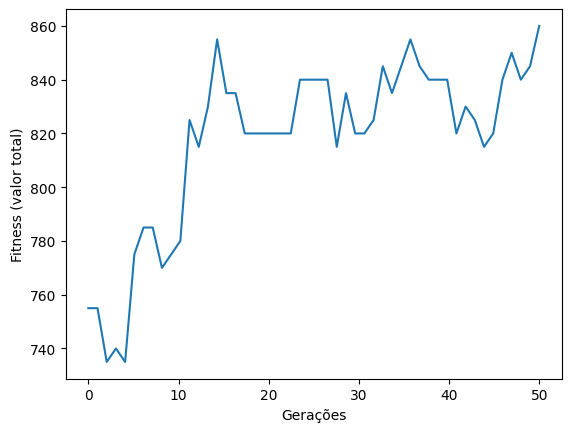

In [ ]:
plt.plot(np.linspace(0, len(historico_fitness), num = len(historico_fitness)), historico_fitness)
plt.xlabel("Gerações")
plt.ylabel("Fitness (valor total)")
plt.show()